In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style("whitegrid")

font = {'family': 'sans-serif', 'serif' : 'Helvetica',
        'size'   : 25}
plt.rc('font', **font)

my_quali_colormaps = ['colorblind', 'Dark2']

In [3]:
storage = os.environ['MICOM_EXP'] + 'setA_coculture_b12_c72/' # on Peregrine
print(storage)

run_status_file = storage + "run_status.tsv"
run_status = pd.read_csv(run_status_file, sep="\t", usecols=['rep_name','simID', 'culture_type', 'program_log_doneSim'])

rep_simID_dict = run_status.loc[run_status['program_log_doneSim']==1.0, :].groupby(['rep_name', 'culture_type'])['simID'].apply(list).to_dict()
rep_simID_dict

/data/s4278836/First_project/experiments/setA_coculture_b12_c72/


{('rep1', 'batch'): ['I_a_I_b_plastic',
  'I_a_I_b_sfm',
  'I_a_II_a_plastic',
  'I_a_II_a_sfm',
  'I_a_II_b_plastic',
  'I_a_II_b_sfm',
  'I_a_V_plastic',
  'I_a_V_sfm',
  'I_b_II_a_plastic',
  'I_b_II_a_sfm',
  'I_b_II_b_plastic',
  'I_b_II_b_sfm',
  'I_b_V_plastic',
  'I_b_V_sfm',
  'II_a_II_b_plastic',
  'II_a_II_b_sfm',
  'II_a_V_plastic',
  'II_a_V_sfm',
  'II_b_V_plastic',
  'II_b_V_sfm'],
 ('rep1', 'continuous'): ['I_a_I_b_plastic',
  'I_a_I_b_sfm',
  'I_a_II_a_plastic',
  'I_a_II_a_sfm',
  'I_a_II_b_plastic',
  'I_a_II_b_sfm',
  'I_a_V_plastic',
  'I_a_V_sfm',
  'I_b_II_a_plastic',
  'I_b_II_a_sfm',
  'I_b_II_b_plastic',
  'I_b_II_b_sfm',
  'I_b_V_plastic',
  'I_b_V_sfm',
  'II_a_II_b_plastic',
  'II_a_II_b_sfm',
  'II_a_V_plastic',
  'II_a_V_sfm',
  'II_b_V_plastic',
  'II_b_V_sfm'],
 ('rep2', 'batch'): ['I_a_I_b_plastic',
  'I_a_I_b_sfm',
  'I_a_II_a_plastic',
  'I_a_II_a_sfm',
  'I_a_II_b_plastic',
  'I_a_II_b_sfm',
  'I_a_V_plastic',
  'I_a_V_sfm',
  'I_b_II_a_plastic',
  

In [4]:
rep_simID_check_dict = {x[0]+'_'+x[1]: {rep_simID_dict[x][i]: 1 for i in range(len(rep_simID_dict[x]))} for x in rep_simID_dict.keys()}
rep_simID_df = pd.DataFrame.from_dict(rep_simID_check_dict, dtype='int')

print(rep_simID_df.head())
print('\n')
print(rep_simID_df.sum())

                  rep1_batch  rep1_continuous  rep2_batch  rep2_continuous  \
I_a_I_b_plastic            1                1           1                1   
I_a_I_b_sfm                1                1           1                1   
I_a_II_a_plastic           1                1           1                1   
I_a_II_a_sfm               1                1           1                1   
I_a_II_b_plastic           1                1           1                1   

                  rep3_batch  rep3_continuous  rep4_batch  rep4_continuous  \
I_a_I_b_plastic            1                1           1                1   
I_a_I_b_sfm                1                1           1                1   
I_a_II_a_plastic           1                1           1                1   
I_a_II_a_sfm               1                1           1                1   
I_a_II_b_plastic           1                1           1                1   

                  rep5_batch  rep5_continuous  
I_a_I_b_plasti

For each replicate & culture condition, if sum returns 20, it means all 20 simulations (10 two-member communities in plastic or non-plastic mode) have sucessfully completed.

In [5]:
rep_name_list = rep_simID_df.columns.values
print(rep_name_list)

community_set = set([x.rsplit('_', 1)[0] for x in rep_simID_df.index.values])
print(community_set)

culture_type_list = ['batch', 'continuous']

media = ['EU_avg', 'high_fat']

['rep1_batch' 'rep1_continuous' 'rep2_batch' 'rep2_continuous'
 'rep3_batch' 'rep3_continuous' 'rep4_batch' 'rep4_continuous'
 'rep5_batch' 'rep5_continuous']
{'II_b_V', 'I_b_II_b', 'I_a_V', 'I_a_I_b', 'I_b_V', 'II_a_V', 'II_a_II_b', 'I_b_II_a', 'I_a_II_b', 'I_a_II_a'}


In [6]:
replicates = ['rep1_batch']

simID = 'I_a_I_b_plastic'

check_culture_type = set(r.rsplit('_')[1] for r in replicates)

if len(check_culture_type) > 1:
    raise ValueError('Function only works for one type of culture, either batch or continuous')

cols = ['species_name', 'time', 'od', 'r']
for i in range(20):
    cols.append('r_' + str(i))
    cols.append('p_' + str(i))

meta_file = storage + 'selected_species_setA.tsv'
meta = pd.read_csv(meta_file, sep="\t")

merged_data = pd.DataFrame()

for r in replicates:
    rep = r.rsplit('_')[0]

#     for m in media:
    m = 'EU_avg'
    
    data_dir = storage + rep + '/v2.10.0_sim_' + simID + '/experiments/' + list(check_culture_type)[0] + '_coculture/'  + m + '/'
    data_file = data_dir + 'species_trajectory.tsv'

    df = pd.read_csv(data_file, sep="\t", usecols=cols)
    df['media'] = m
    df['replicate'] = rep

    merged_data = pd.concat([merged_data, df])
    
members = meta.loc[meta['Species_name'].isin(df['species_name'].unique()), :]
print(members)

merged_data.reset_index(drop=True)

merged_data

  Ecotype Ecotype_ID Species_ID                    Species_name
0       I        I_a    setA_15       Helicobacter_pylori_26695
1       I        I_b    setA_21  Pseudomonas_nitroreducens_HBP1


species_name       time          od        r      r_0  \
0          Helicobacter_pylori_26695   0.000000    0.001000  1.88320  1.88320   
1     Pseudomonas_nitroreducens_HBP1   0.000000    0.001000  5.97626  5.97626   
2          Helicobacter_pylori_26695   0.035470    0.001069  1.88320  1.88320   
3     Pseudomonas_nitroreducens_HBP1   0.035470    0.001236  5.97626  5.97626   
4          Helicobacter_pylori_26695   0.066995    0.001134  1.88320  1.88320   
...                              ...        ...         ...      ...      ...   
1003  Pseudomonas_nitroreducens_HBP1  11.966400  190.361000 -0.10000  0.00000   
1004       Helicobacter_pylori_26695  11.990500   72.753700 -0.10000  0.00000   
1005  Pseudomonas_nitroreducens_HBP1  11.990500  190.361000 -0.10000  0.00000   
1006       Helicobacter_pylori_26695  12.000000   72.753700 -0.10000  0.00000   
1007  Pseudomonas_nitroreducens_HBP1  12.000000  190.361000 -0.10000  0.00000   

      r_1  r_2  r_3  r_4  r_5  ...          p_12          p_13          p_14  \
0    -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.000000e+00  0.000000e+00  0.000000e+00   
1    -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.000000e+00  0.000000e+00  0.000000e+00   
2    -0.0 -0.0 -0.0 -0.0 -0.0  ...  6.707000e-19  6.707000e-19  6.707000e-19   
3    -0.0 -0.0 -0.0 -0.0 -0.0  ...  1.755930e-54  1.755930e-54  1.755930e-54   
4    -0.0 -0.0 -0.0 -0.0 -0.0  ...  1.166650e-18  1.166650e-18  1.166650e-18   
...   ...  ...  ...  ...  ...  ...           ...           ...           ...   
1003  0.0  0.0  0.0  0.0 -0.0  ...  5.000000e-02  5.000000e-02  5.000000e-02   
1004  0.0  0.0  0.0  0.0  0.0  ...  5.000000e-02  5.000000e-02  5.000000e-02   
1005  0.0  0.0  0.0  0.0 -0.0  ...  5.000000e-02  5.000000e-02  5.000000e-02   
1006  0.0  0.0  0.0  0.0  0.0  ...  5.000000e-02  5.000000e-02  5.000000e-02   
1007  0.0  0.0  0.0  0.0 -0.0  ...  5.000000e-02  5.000000e-02  5.000000e-02   

              p_15          p_16          p_17          p_18          p_19  \
0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2     6.707000e-19  6.707000e-19  6.707000e-19  6.707000e-19  6.707000e-19   
3     1.755930e-54  1.755930e-54  1.755930e-54  1.755930e-54  1.755930e-54   
4     1.166650e-18  1.166650e-18  1.166650e-18  1.166650e-18  1.166650e-18   
...            ...           ...           ...           ...           ...   
1003  5.000000e-02  5.000000e-02  5.000000e-02  5.000000e-02  5.000000e-02   
1004  5.000000e-02  5.000000e-02  5.000000e-02  5.000000e-02  5.000000e-02   
1005  5.000000e-02  5.000000e-02  5.000000e-02  5.000000e-02  5.000000e-02   
1006  5.000000e-02  5.000000e-02  5.000000e-02  5.000000e-02  5.000000e-02   
1007  5.000000e-02  5.000000e-02  5.000000e-02  5.000000e-02  5.000000e-02   

       media  replicate  
0     EU_avg       rep1  
1     EU_avg       rep1  
2     EU_avg       rep1  
3     EU_avg       rep1  
4     EU_avg       rep1  
...      ...        ...  
1003  EU_avg       rep1  
1004  EU_avg       rep1  
1005  EU_avg       rep1  
1006  EU_avg       rep1  
1007  EU_avg       rep1  

[1008 rows x 46 columns]

In [7]:
from matplotlib.collections import LineCollection

def gradient_line(data, x, y, gradient, ymin, ymax, ax, cmap='hot_r', lw=2): # Sourced from matplotlib documentation
    x_ = np.array(data[x])
    y_ = np.array(data[y])
    grad = np.array(data[gradient])[1:]
    
    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be (numlines) x (points per line) x 2 (for x and y)
    points = np.array([x_, y_]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(0.0, 1.0)
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    
    # Set the values used for colormapping
    lc.set_array(grad)
    lc.set_linewidth(lw)
    line = ax.add_collection(lc)
    
    ax.set_xlim(x_.min(), x_.max())
    ax.set_ylim(ymin, ymax)
    
    return line

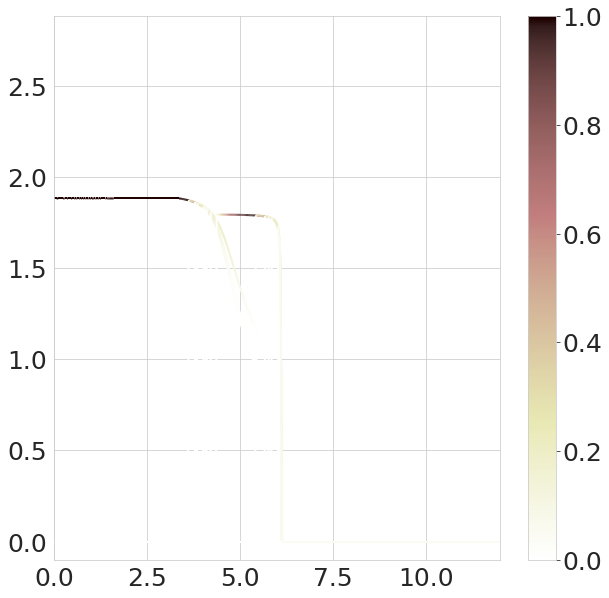

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_data = merged_data.loc[merged_data['species_name'] == 'Helicobacter_pylori_26695', :]

for i in range(20):
    grad_line = gradient_line(data=plot_data, x='time', y='r_' + str(i), gradient='p_' + str(i), 
                              ymin=-0.1, ymax=plot_data['r'].max()+1.0, 
                              cmap='pink_r', ax=ax)
    
    if i==19:
        fig.colorbar(grad_line, ax=ax)

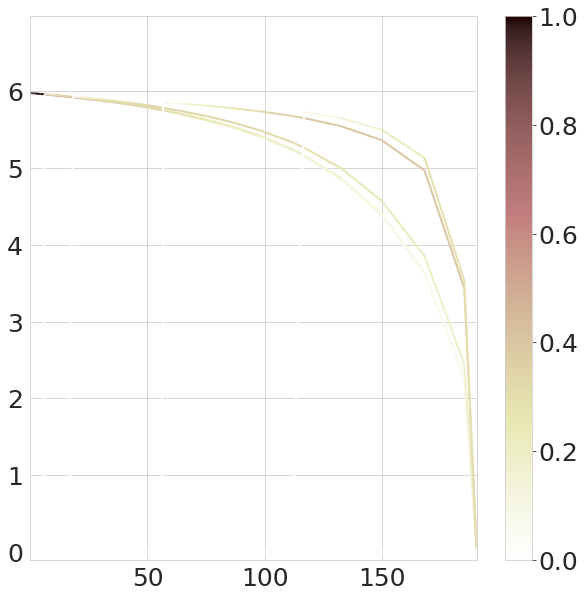

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_data = merged_data.loc[merged_data['species_name'] == 'Pseudomonas_nitroreducens_HBP1', :]

for i in range(20):
    grad_line = gradient_line(data=plot_data, x='od', y='r_' + str(i), gradient='p_' + str(i), 
                              ymin=-0.1, ymax=plot_data['r'].max()+1.0, 
                              cmap='pink_r', ax=ax)
    
    if i==19:
        fig.colorbar(grad_line, ax=ax)